# PumpItUp
## DrivenDataCompetition PumpItUp
- All data is within the same folder as notebook

In [1]:
import pandas as pd
import matplotlib as plt
import sklearn
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [2]:
# load training-data and labels
trainingValues = pd.read_csv('4910797b-ee55-40a7-8668-10efd5c1b960.csv')
trainingLabels = pd.read_csv('0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
trainingData = pd.merge(trainingValues, trainingLabels, on= 'id')

# Investigation and Cleansing of data
Possible data-issues
* population == 0 -> Maybe delete all lines with population?
* num_private Not in feature-description -> Maybe delete column?
* object-data needs to be converted in category-numbers
* idea: funders and installers who fund and install regularly are less porbable to create failing pumps than those who do it less often. Thererfore the names are exchanged with the number of occurances. Same for basin, wpt_name, subvillage, scheme_name and schmeme_management

In [3]:
# Describe data
trainingData.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


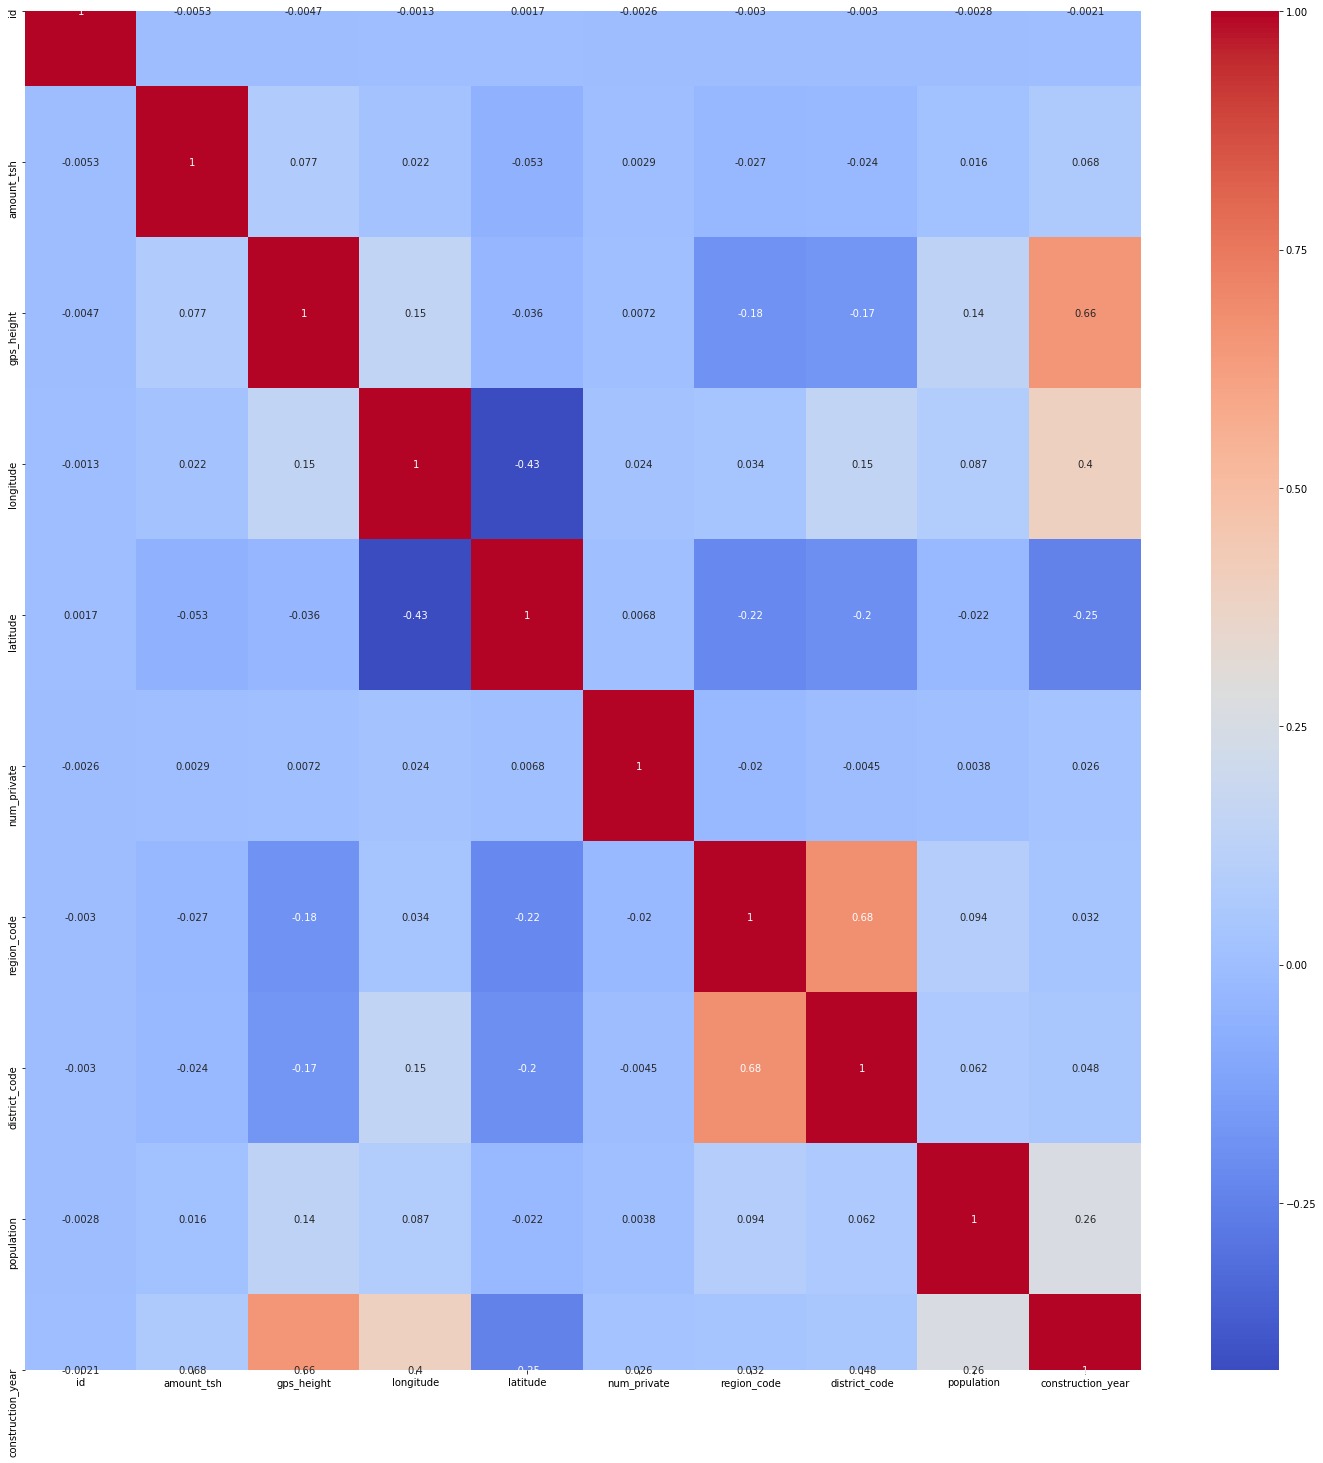

In [4]:
#check correlation 
fig = plt.pyplot.gcf() 
fig.set_size_inches(25,25) 
sns.heatmap(trainingData.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [23]:
trainingData.tail(100)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
59300,20291,20.0,2013-12-01,Olumuro,997,Village community,36.725153,-3.607855e+00,Shule Ya Msingi,0,...,soft,good,enough,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,functional
59301,64190,0.0,2013-02-07,Unhcr,1329,TWESA,30.594555,-3.738353e+00,Nyaruyoba A Primary School,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional needs repair
59302,18751,0.0,2013-03-02,Government Of Tanzania,1904,MANYARA CONSTRUCTION,35.349663,-4.232319e+00,Semwea B,0,...,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump,non functional
59303,71704,0.0,2013-02-26,Government Of Tanzania,1503,DWE,37.431041,-3.296268e+00,Kwa Kitiwi,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59304,65759,0.0,2012-10-12,Rwssp,0,WEDECO,34.160104,-3.015089e+00,Ng'Wangesa,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional
59305,31484,5000.0,2011-02-26,Wsdp,100,Wachina,38.858794,-6.782239e+00,Hamis Uweso,0,...,soft,good,insufficient,insufficient,river,river/lake,surface,communal standpipe,communal standpipe,functional
59306,71419,0.0,2013-01-16,Cocern,1296,TWESA,30.930385,-3.300592e+00,Kwa Mhunda,0,...,unknown,unknown,unknown,unknown,spring,spring,groundwater,improved spring,improved spring,non functional
59307,61578,20.0,2013-03-18,Government Of Tanzania,974,DWE,36.818428,-3.489770e+00,Kwa Stephan,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59308,15759,1200.0,2011-03-22,Tredep,0,TREDEP,37.448115,-5.434459e+00,Kwa Mataula,0,...,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59309,50703,50.0,2013-01-22,Makonde,465,Makonde,39.423152,-1.087374e+01,Mwinyi,0,...,soft,good,seasonal,seasonal,spring,spring,groundwater,communal standpipe,communal standpipe,functional


In [40]:
# cleanData

def cleanData(data : pd.DataFrame, columns: list): # Wrapper for petterperforming clean-solution
    return cleanDataV2(data, columns)

def cleanDataV1(data : pd.DataFrame, columns : list):
    #data = data[data.population != 0] # delete population == 0
    if 'num_private' in data.columns: # drop 'num_private'
        data = data.drop('num_private', axis = 1)
    
    data['public_meeting'] = data['public_meeting'].fillna('True') #fill nan with 'True'
    data['permit'] = data['permit'].fillna('True')
    
    for columnName in columns: # make all strings lower case and replace names with number of occurence.
        data[columnName] = data[columnName].fillna('unknown')
        data.loc[data[columnName].str.len() <=2, columnName] = 'unknown'
        data.loc[data[columnName] == 'none', columnName] = 'unknown'
        data[columnName].str.lower()
        data = data.replace({columnName : data[columnName].value_counts().to_dict()})
        
    #change data-recorded to year- and month-only-columns
    data['date_recorded'] = pd.to_datetime(data['date_recorded'], format='%Y-%m-%d')
    data['year_recorded'] =data['date_recorded'].dt.year
    data['year_recorded'] = data['year_recorded'].astype('object')

    data['month_recorded'] = data['date_recorded'].dt.month
    data['month_recorded'] = data['month_recorded'].astype('object')
    
    data['day_recorded'] = data['date_recorded'].dt.day
    data['day_recorded'] = data['day_recorded'].astype('object')

    data = data.drop('date_recorded', axis = 1)
    
    #change labels to category data
    cat_columns = data.select_dtypes(['object']).columns
    if len(cat_columns) == 0:
        return data
    data[cat_columns] = data[cat_columns].astype('category')
    cat_data = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.join(cat_data, rsuffix='_cat')
    
        
    return data

def cleanDataV2(data : pd.DataFrame, columns : list):
    #data = data[data.population != 0] # delete population == 0
    if 'num_private' in data.columns: # drop 'num_private'
        data = data.drop('num_private', axis = 1)
    
    #drop NaN
    data.dropna(inplace = True)
    
    for columnName in columns: # make all strings lower case and replace names with number of occurence.
        data.loc[data[columnName].str.len() <=2, columnName] = 'unknown'
        data.loc[data[columnName] == 'none', columnName] = 'unknown'
        data[columnName].str.lower()
        data = data.replace({columnName : data[columnName].value_counts().to_dict()})
        
    #change data-recorded to year- and month-only-columns
    data['date_recorded'] = pd.to_datetime(data['date_recorded'], format='%Y-%m-%d')
    data['year_recorded'] =data['date_recorded'].dt.year
    data['year_recorded'] = data['year_recorded'].astype('object')

    data['month_recorded'] = data['date_recorded'].dt.month
    data['month_recorded'] = data['month_recorded'].astype('object')
    
    data['day_recorded'] = data['date_recorded'].dt.day
    data['day_recorded'] = data['day_recorded'].astype('object')

    data = data.drop('date_recorded', axis = 1)
    
    #change labels to category data
    cat_columns = data.select_dtypes(['object']).columns
    if len(cat_columns) == 0:
        return data
    data[cat_columns] = data[cat_columns].astype('category')
    cat_data = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.join(cat_data, rsuffix='_cat')
    
        
    return data


def cleanDataWithoutDropping(data : pd.DataFrame, columns : list):
    #data = data[data.population != 0] # delete population == 0
    if 'num_private' in data.columns: # drop 'num_private'
        data = data.drop('num_private', axis = 1)
    
    data['public_meeting'] = data['public_meeting'].fillna('True') #fill nan with 'True'
    data['permit'] = data['permit'].fillna('True')
    
    for columnName in columns: # make all strings lower case and replace names with number of occurence.
        data[columnName] = data[columnName].fillna('unknown')
        data.loc[data[columnName].str.len() <=2, columnName] = 'unknown'
        data.loc[data[columnName] == 'none', columnName] = 'unknown'
        data[columnName].str.lower()
        data = data.replace({columnName : data[columnName].value_counts().to_dict()})
        
    #change data-recorded to year- and month-only-columns
    data['date_recorded'] = pd.to_datetime(data['date_recorded'], format='%Y-%m-%d')
    data['year_recorded'] =data['date_recorded'].dt.year
    data['year_recorded'] = data['year_recorded'].astype('object')

    data['month_recorded'] = data['date_recorded'].dt.month
    data['month_recorded'] = data['month_recorded'].astype('object')
    
    data['day_recorded'] = data['date_recorded'].dt.day
    data['day_recorded'] = data['day_recorded'].astype('object')

    data = data.drop('date_recorded', axis = 1)
    
    #change labels to category data
    cat_columns = data.select_dtypes(['object']).columns
    if len(cat_columns) == 0:
        return data
    data[cat_columns] = data[cat_columns].astype('category')
    cat_data = data[cat_columns].apply(lambda x: x.cat.codes)
    data = data.join(cat_data, rsuffix='_cat')
    
        
    return data



In [19]:
# prepare data

def prepareData(data):
    #split in labels and features
    labels = data['status_group_cat']
    features = data.drop(['status_group_cat','id'],axis=1)
    no_use_columns = features.select_dtypes(['category']).columns
    features = features.drop(no_use_columns, axis=1)
    features_list = features.columns

    #split labels and features is train-data and test-data
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

    #check shape
    if (train_features.shape != train_labels.shape) or (test_features.shape != test_labels.shape):
        print ('ERROR: Shape of data failed')
    
    return train_features, test_features, train_labels, test_labels

In [20]:
#Experiment 1: Deleting works better than substitution
#Result: Value substitution performs better than deleting NaNs (Accuracy 0.8343399482312338 in comparison to 0.8146801346801347)
DONE = True
if DONE is False:
    randomForest = RandomForestClassifier(n_estimators= 1600, min_samples_split= 5, min_samples_leaf= 1, max_depth= 100, bootstrap= True, max_features= 'auto')
    

    
    trainingDataV1 = cleanDataV1(trainingData.copy(), ['funder', 'installer','wpt_name','basin', 'subvillage','scheme_name', 'scheme_management'])
    print('dataV1 cleaned')
    trainingDataV2 = cleanDataV2(trainingData.copy(), ['funder', 'installer','wpt_name','basin', 'subvillage','scheme_name', 'scheme_management'])
    print('dataV2 cleaned')
    train_features, test_features, train_labels, test_labels = prepareData(trainingDataV1)
    print('dataV1 prepared')
    randomForest.fit(train_features, train_labels)
    predictions = randomForest.predict(test_features)
    accuracyV1 = sklearn.metrics.accuracy_score(test_labels, predictions)
    print("accuracyV1: ", accuracyV1)
    train_features, test_features, train_labels, test_labels = prepareData(trainingDataV2)
    print ('dataV2 prepared')
    randomForest.fit(train_features, train_labels)
    predictions = randomForest.predict(test_features)
    accuracyV2 = sklearn.metrics.accuracy_score(test_labels, predictions)
    print("accuracyV2: ", accuracyV2)
        


dataV1 cleaned
dataV2 cleaned
ERROR: Shape of data failed
dataV1 prepared
accuracyV1:  0.8146801346801347
ERROR: Shape of data failed
dataV2 prepared
accuracyV2:  0.8343399482312338


In [17]:
trainingDataV1.head()

,id,amount_tsh,funder,gps_height,installer,longitude,latitude,wpt_name,basin,subvillage,...,quantity_group_cat,source_cat,source_type_cat,source_class_cat,waterpoint_type_cat,waterpoint_type_group_cat,status_group_cat,year_recorded_cat,month_recorded_cat,day_recorded_cat
0,69572,6000.0,275,1390,94,34.938093,-9.856322,3591,5085,6,...,1,8,6,0,1,1,0,2,2,13
1,8776,0.0,53,1399,39,34.698766,-2.147466,830,10248,5,...,2,5,3,1,1,1,0,4,2,5
2,34310,25.0,8,686,408,37.460664,-3.821329,3,8940,502,...,1,0,1,1,2,1,0,4,1,24
3,67743,0.0,1057,263,222,38.486161,-11.155298,1,4493,17,...,0,3,0,0,2,1,2,4,0,27
4,19728,0.0,1,0,135,31.130847,-1.825359,1748,10248,2,...,3,5,3,1,1,1,0,2,6,12


# Try random forest


In [ ]:
## Try random fit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import pickle

##create random grid
# number of trees in forest
n_estimators = [int(x) for x in np.linspace(start = 500, stop= 2000, num = 100)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 4, 5, 6, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 3, 4]
# Method for selecting samples for training each node
bootstrap = [True, False]
# max features
max_features = ['auto', 'log2', 'sqrt']

random_grid = {'n_estimators': n_estimators,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'max_features': max_features,
              'bootstrap': bootstrap}

randomforest = RandomForestClassifier()

randomforest_random = RandomizedSearchCV(estimator = randomforest, param_distributions=random_grid, n_iter = 100, cv= None, verbose= 20, random_state= 42, n_jobs = -1)
randomforest_random.fit(features, labels)
best_estimator = randomforest_random.best_estimator_

# Show parameters
print('Best parameters: ',randomforest_random.best_params_)

# Show Accuracy
predictions = best_estimator.predict(test_features)
print ('Accuracy-Score of randomforest is: ', sklearn.metrics.accuracy_score(test_labels, predictions))



In [41]:



def competitionOutput(filenameIn, filenameOut ,estimator):
    # prepare competition features
    competition_features = pd.read_csv(filenameIn)
    print('competition_features shape: ',competition_features.shape)
    competition_features_prepared = cleanDataWithoutDropping(competition_features, ['funder', 'installer','wpt_name','basin', 'subvillage','scheme_name', 'scheme_management'])
    competition_features_prepared = competition_features_prepared.drop(['id'],axis=1)
    no_use_columns = competition_features_prepared.select_dtypes(['category']).columns
    competition_features_prepared = competition_features_prepared.drop(no_use_columns, axis=1)
    
    print('competition features prepared shape: ', competition_features_prepared.shape)

    predictions = estimator.predict(competition_features_prepared)
    print('shape predictions', predictions.shape)
    competition_result = pd.read_csv(filenameIn)
    print('shape competition_result', competition_result.shape)
    competition_result['status_group'] = predictions
    competition_result = competition_result[['id', 'status_group']]
    competition_result['status_group'] = competition_result['status_group'].replace([0,1,2],['functional','functional needs repair', 'non functional'])

    # create output csv
    competition_result.to_csv(filenameOut, index=False)
    return competition_features_prepared

competition_features_prepared = competitionOutput('702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv', 'predictionsV4.csv', randomForest)
competition_features_prepared.columns[competition_features_prepared.isna().any()].tolist()

competition_features shape:  (14850, 40)
competition features prepared shape:  (14850, 40)
shape predictions (14850,)
shape competition_result (14850, 40)


[]

NameError: name 'competition_features_prepared' is not defined